# Lecture 6: Representing linear multivariate models with vectors and matrices

## Lecture overview

1. [Motivation](#section1)
2. [Vectors](#section2)
3. [Matrices](#section3)
4. [Addition](#section4)
5. [Multiplication](#section5)
6. [Summary](#section6)

<span id='section1'></span>
## 1. Motivation
<hr>

Until now, we have been dealing with problems in a single variable changing over time.
  
Often, dynamical systems involve more than one variable (ie, they are **multivariate**). For instance, we may be interested in how the numbers of two species change as they interact (e.g., compete) with one another.

As an introductory example with more than one variable, consider a model tracking the number of birds on two islands. Let the number of birds on island 1 be $n_1$ and let the number of birds on island 2 be $n_2$. We assume the birds migrate from island $j$ to island $i$ at per capita rate $m_{ij}$, the birds on each island give birth at per capita rates $b_1$ and $b_2$, the birds on each island die at per capita rates $d_1$ and $d_2$, and new birds arrive on each island at rates $m_1$ and $m_2$. This is captured in the following flow diagram

<center>
```mermaid
graph LR;
    A1((n1)) --b1 n1--> A1;
    B1[ ] --m1--> A1;
    A1 --d1 n1--> C1[ ];
    A2((n2)) --b2 n2--> A2;
    B2[ ] --m2--> A2;
    A2 --d2 n2--> C2[ ];
    A1 --m21 n1--> A2;
    A2 --m12 n2--> A1;
    style B1 height:0px;
    style C1 height:0px;
    style B2 height:0px;
    style C2 height:0px;
```   
</center>
    
The rate of change in $n_1$ and $n_2$ are then described by the following system of differential equations

$$
\begin{aligned}
\frac{\mathrm{d}n_1}{\mathrm{d}t} &= (b_1 - d_1 - m_{21})n_1 + m_{12} n_2 + m_1 \\
\frac{\mathrm{d}n_2}{\mathrm{d}t} &= m_{21} n_1 + (b_2 - d_2 - m_{12})n_2 + m_2
\end{aligned}
$$

These equations are linear functions of the variables (i.e., they contain only constant multiples of $n_1$ and $n_2$ and nothing more complicated such as $n_1^2$ or $e^{n_2}$).

Linear systems of equations like these can also be written in **matrix form**

$$
\begin{aligned}
\begin{pmatrix} \frac{\mathrm{d}n_1}{\mathrm{d}t} \\ \frac{\mathrm{d}n_2}{\mathrm{d}t} \end{pmatrix} 
&= \begin{pmatrix} b_1 - d_1 - m_{21} & m_{12} \\ m_{21} & b_2 - d_2 - m_{12} \end{pmatrix}
\begin{pmatrix} n_1 \\ n_2 \end{pmatrix} 
+ \begin{pmatrix} m_1 \\ m_2 \end{pmatrix}\\
\frac{\mathrm{d}\vec{n}}{\mathrm{d}t} &= \mathbf{M}\vec{n} + \vec{m}
\end{aligned}
$$

Not only is this a nice compact expression, there are rules of linear algebra that can help us conveniently solve this (and any other) set of linear equations.

Let's get to know these rules.

<span id='section2'></span>
## 2.Vectors
<hr>

**Vectors** are lists of elements (elements being numbers, parameters, functions, or variables).

A **column vector** has elements arranged from top to bottom

$$
\begin{equation*}
\begin{pmatrix}
  5 \\
  2
\end{pmatrix},
\begin{pmatrix}
  1 \\
  5 \\
  9 \\
  7
\end{pmatrix},
\begin{pmatrix}
  x \\
  y
\end{pmatrix},
\begin{pmatrix}
  x \\
  y \\
  z
\end{pmatrix},
\begin{pmatrix}
  x_1 \\
  x_2 \\
  \vdots \\
  x_n
\end{pmatrix}
\end{equation*}
$$

A **row vector** has elements arranged from left to right

$$
\begin{pmatrix}5 & 2\end{pmatrix}, \begin{pmatrix} 1 & 5 & 9 & 7\end{pmatrix}, \begin{pmatrix} x & y \end{pmatrix}, \begin{pmatrix} x & y & z\end{pmatrix}, \begin{pmatrix} x_1 & x_2 & \cdots & x_n \end{pmatrix}
$$

**Transposing** a vector switches it from a row vector to a column vector or vice-versa,

$$
\begin{equation*}
\begin{pmatrix}
  a \\
  b \\
  c
\end{pmatrix}^\intercal
= 
\begin{pmatrix}
  a & b & c
\end{pmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\begin{pmatrix}
  a & b & c
\end{pmatrix}
\end{equation*}^\intercal
= 
\begin{pmatrix}
  a \\
  b \\
  c
\end{pmatrix}
$$

We will indicate vectors by placing an arrow on top of the symbol

$$
\vec{x} = \begin{pmatrix} x_1 & x_2 & \cdots & x_n \end{pmatrix}
$$

The number of elements in the vector indicates its **dimension**, $n$.

For example, the row vector $\begin{pmatrix}x & y\end{pmatrix}$ has dimension $n=2$.

You can represent a vector of dimension $n$ as an arrow in $n$ dimensions, connecting the origin with a point whose coordinates are given by elements in the vector. For example, the vector $\vec{v} = \begin{pmatrix} 1\\2\end{pmatrix}$ can be depicted as below.

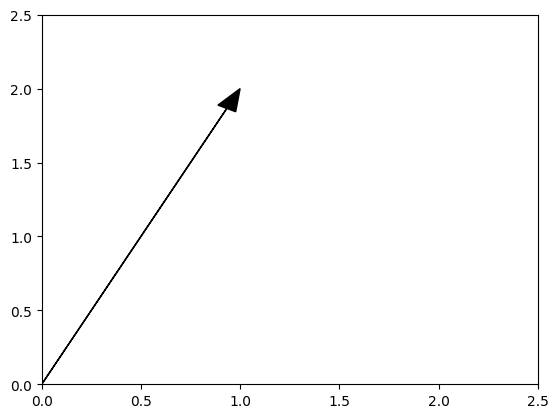

In [4]:
import matplotlib.pyplot as plt #import plotting library

plt.arrow(0, 0, #starting x and y values of arrow
          1, 2, #change in x and y 
          head_width=0.1, color='black', length_includes_head=True) #aesthetics
plt.xlim(0,2.5) #set bounds on x axis
plt.ylim(0,2.5) #set bounds on y axis
plt.show()

<span id='section3'></span>
## 3. Matrices
<hr>

An $m \times n$ **matrix** has $m$ rows and $n$ columns (a vector can be seen as a special case, where either $m$ or $n$ is 1)

$$
\begin{equation*}
\begin{pmatrix}
  x_{11}  & x_{12} & \cdots & x_{1n}\\
  x_{21}  & x_{22} & \cdots & x_{2n}\\
  \vdots & \vdots &        & \vdots\\
  x_{m1}  & x_{m2} & \cdots & x_{mn}\\
\end{pmatrix},
\begin{pmatrix}
  a & b \\
  c & d
\end{pmatrix},
\begin{pmatrix}
  75 & 67 \\
  66 & 34 \\
  12 & 14
\end{pmatrix},
\begin{pmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{pmatrix}
\end{equation*}
$$

We will indicate matrices by bolding the symbol (and using capital letters)

$$
\mathbf{X} = \begin{pmatrix}
  x_{11}  & x_{12} & \cdots & x_{1n}\\
  x_{21}  & x_{22} & \cdots & x_{2n}\\
  \vdots & \vdots &        & \vdots\\
  x_{m1}  & x_{m2} & \cdots & x_{mn}\\
\end{pmatrix}
$$

A matrix with an equal number of rows and columns, $m=n$, is a **square matrix**

$$
\begin{pmatrix}
  a & b & c \\
  d & e & f \\
  g & h & i
\end{pmatrix}
$$
  
A matrix with zeros everywhere except along the diagonal is called a **diagonal matrix**
  
$$
\begin{pmatrix}
  a & 0 & 0 \\
  0 & b & 0 \\
  0 & 0 & c
\end{pmatrix}
$$
   
And a special case of this with 1s along the diagonal is called the **identity matrix**

$$
\begin{pmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{pmatrix}
$$
  
A matrix with all zeros below the diagonal is called an **upper triangular matrix**

$$
\begin{pmatrix}
  a & b & c \\
  0 & d & e \\
  0 & 0 & f
\end{pmatrix}
$$
  
A matrix with all zeros above the diagonal is called an **lower triangular matrix**

$$
\begin{pmatrix}
  a & 0 & 0 \\
  b & d & 0 \\
  c & e & f
\end{pmatrix}
$$

It is sometimes useful to chop a matrix up into multiple blocks, creating a **block matrix**

$$
\begin{pmatrix}
  a & b & c \\
  d & e & f \\
  g & h & i
\end{pmatrix}
= 
\begin{pmatrix}
  \mathbf{A} & \mathbf{B} \\
  \mathbf{C} & \mathbf{D}
\end{pmatrix}
$$

where $\mathbf{A}=\begin{pmatrix} a & b \\ d & e\end{pmatrix}$, $\mathbf{B}=\begin{pmatrix} c\\ f\end{pmatrix}$, $\mathbf{C}=\begin{pmatrix} g & h \end{pmatrix}$, and $\mathbf{D}=\begin{pmatrix} i\end{pmatrix}$. 

This is especially helpful when the block form has off-diagonal submatrices consisting of all zeros. For instance, when $\mathbf{B}=\begin{pmatrix} 0\\0\end{pmatrix}$ or $\mathbf{C}=\begin{pmatrix} 0 & 0 \end{pmatrix}$, we have a **block triangular matrix**. And when $\mathbf{B}=\begin{pmatrix} 0\\0\end{pmatrix}$ and $\mathbf{C}=\begin{pmatrix} 0 & 0 \end{pmatrix}$, 
we have a **block diagonal matrix**.

Finally, it is sometimes useful to **transpose** a matrix, which exchanges the rows and columns (an element in row $i$ column $j$ moves to row $j$ column $i$)

$$
\begin{pmatrix}
  a_1 & a_2 & a_3 \\
  b_1 & b_2 & b_3
\end{pmatrix}^\intercal
= 
\begin{pmatrix}
  a_1 & b_1  \\
  a_2 & b_2  \\
  a_3 & b_3
\end{pmatrix}
$$

Like vectors, matrices have a graphical/geometrical interpretation: they stretch and rotate vectors (as we will see shortly).

<span id='section4'></span>
## 4. Addition
<hr>

Vector and matrix **addition** (and subtraction) is straightforward, entry-by-entry:

$$
\begin{equation*}
\begin{pmatrix}
  a \\
  b
\end{pmatrix}
+
\begin{pmatrix}
  c \\
  d
\end{pmatrix}
=
\begin{pmatrix}
  a+c \\
  b+d
\end{pmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\begin{pmatrix}
  a & b \\
  c & d
\end{pmatrix}
+
\begin{pmatrix}
  e & f \\
  g & h
\end{pmatrix}
=
\begin{pmatrix}
  a+e & b+f \\
  c+g & d+h
\end{pmatrix}
\end{equation*}
$$

!!! warning 

    The vectors or matrices added together must have the same dimension!
    
Geometrically, adding vectors is like placing the second vector at the end of the first. Below we add the black and red vectors together to get the blue vector.

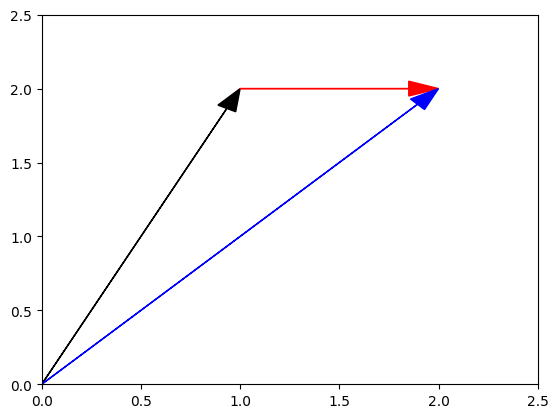

In [3]:
import matplotlib.pyplot as plt #import plotting library

v1 = [1,2] #vector 1
v2 = [1,0] #vector 2
v12 = [i+j for i,j in zip(v1,v2)] #sum of the two vectors

#first vector
plt.arrow(0, 0, #starting x and y values of arrow
          v1[0], v1[1], #change in x and y 
          head_width=0.1, color='black', length_includes_head=True) #aesthetics

#second vector placed at the end of first vector
plt.arrow(v1[0], v1[1], #starting x and y values of arrow
          v2[0], v2[1], #change in x and y 
          head_width=0.1, color='red', length_includes_head=True) #aesthetics

#sum of the vectors
plt.arrow(0, 0, #starting x and y values of arrow
          v12[0], v12[1], #change in x and y 
          head_width=0.1, color='blue', length_includes_head=True) #aesthetics

plt.xlim(0,2.5) #set bounds on x axis
plt.ylim(0,2.5) #set bounds on y axis
plt.show()

<span id='section5'></span>
## 5. Multiplication
<hr>

Vector and matrix **multiplication** by a scalar (which may be a constant, a variable, or a function, but not a matrix or a vector) is also straightforward, we just multiply every element by the scalar:

$$
\begin{equation*}
\alpha 
\begin{pmatrix}
  a \\
  b
\end{pmatrix}
=
\begin{pmatrix}
  \alpha a \\
  \alpha b
\end{pmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\alpha 
\begin{pmatrix}
  a & b\\
  c & d
\end{pmatrix}
=
\begin{pmatrix}
  \alpha a & \alpha b\\
  \alpha c & \alpha d
\end{pmatrix}
\end{equation*}
$$

Geometrically, multiplying by a scalar stretches (if $\alpha>1$) or compresses (if $\alpha<1$) a vector. Below we multiply the black vector by $1/2$ to get the red vector.

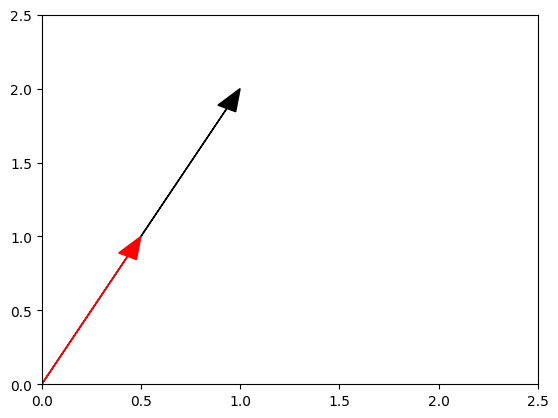

In [6]:
import matplotlib.pyplot as plt #import plotting library

v1 = [1,2] #vector 1
alpha = 1/2 #scalar
v2 = [i*alpha for i in v1] #multiplication by a scalar

#original vector
plt.arrow(0, 0, #starting x and y values of arrow
          v1[0], v1[1], #change in x and y 
          head_width=0.1, color='black', length_includes_head=True) #aesthetics

#stretched vector
plt.arrow(0, 0, #starting x and y values of arrow
          v2[0], v2[1], #change in x and y 
          head_width=0.1, color='red', length_includes_head=True) #aesthetics

plt.xlim(0,2.5) #set bounds on x axis
plt.ylim(0,2.5) #set bounds on y axis
plt.show()

Multiplying vectors and matrices together is a bit trickier, but is based on the fact that a row vector times a column vector is equal to the sum of the products of their respective entries

$$
\begin{equation*}
\begin{pmatrix} a & b & c \end{pmatrix}
\begin{pmatrix}
  x \\
  y \\
  z
\end{pmatrix}
= ax + by + cz
\end{equation*}
$$

This is referred to as the **dot product**. (There are other types of products for vectors and matrices, which we won't cover in this class.)

To multiply a matrix by a vector, this procedure is repeated: first for the first row of the matrix, then for the second row of the matrix, etc, and stacking the sums in the resulting vector,

$$
\begin{equation*}
\begin{pmatrix}
  a & b & c \\
  d & e & f \\
  g & h & i
\end{pmatrix}
\begin{pmatrix}
  x \\
  y \\
  z
\end{pmatrix}
=
\begin{pmatrix}
  ax + by + cz \\
  dx + ey + fz \\
  gx + hy + iz \\
\end{pmatrix}
\end{equation*}
$$

Geometrically, multiplying a vector by a matrix stretches *and* rotates a vector. Below we multiply the black vector by a matrix to get the red vector.

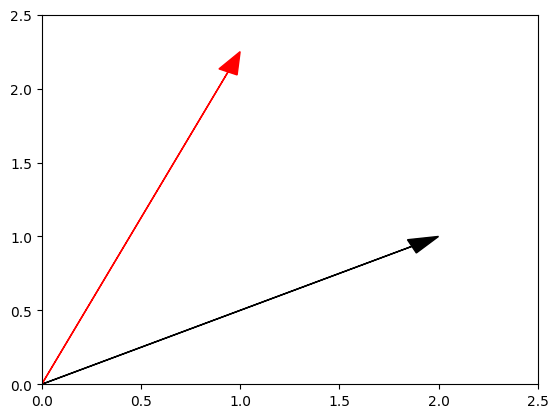

In [8]:
import matplotlib.pyplot as plt #import plotting library
from sympy import *

v = Matrix([[2],[1]]) #column vector
M = Matrix([[1,-1],[1,1/4]]) #matrix
u = M*v

#original vector
plt.arrow(0, 0, #starting x and y values of arrow
          float(v[0]), float(v[1]), #change in x and y 
          head_width=0.1, color='black', length_includes_head=True) #aesthetics

#stretched and rotated vector
plt.arrow(0, 0, #starting x and y values of arrow
          float(u[0]), float(u[1]), #change in x and y 
          head_width=0.1, color='red', length_includes_head=True) #aesthetics

plt.xlim(0,2.5) #set bounds on x axis
plt.ylim(0,2.5) #set bounds on y axis
plt.show()

To multiply a matrix by a matrix, the same procedure is then also repeated acros the columns of the second matrix: first for the first column of the second matrix, then for the second column of the second matrix, etc, and placing the sums in their respective rows and columns of the resulting matrix,

$$
\begin{equation*}
\begin{pmatrix}
  a & b \\
  c & d
\end{pmatrix}
\begin{pmatrix}
  e & f \\
  g & h
\end{pmatrix}
=
\begin{pmatrix}
  ae + bg & af + bh \\
  ce + dg & cf + dh
\end{pmatrix}
\end{equation*}
$$

!!! warning 

    An $m \times n$ matrix (or vector) $\mathbf{A}$ can be multiplied on the right by $\mathbf{B}$ *only* if $\mathbf{B}$ is an $n \times p$ matrix (or vector). The resulting matrix (or vector) will then be $m \times p$. 

As opposed to basic algebra, matrix multiplication is *not* commutative. That is, $\mathbf{AB}$ does not generally equal $\mathbf{BA}$.

This means that if we want to multiply both sides of an equation, e.g., $\mathbf{AB} = \mathbf{C}$, by $\mathbf{D}$, we need to do so on the same side, either multiplying by $\mathbf{D}$ on the right $\mathbf{ABD} = \mathbf{CD}$ or on the left $\mathbf{DAB} = \mathbf{DC}$. 

On the other hand, matrix multiplication does satisfy the other basic algebra rules:

- $(\mathbf{AB})\mathbf{C} = \mathbf{A}(\mathbf{BC})$ (associative law)
- $\mathbf{A}(\mathbf{B+C}) = \mathbf{AB}+\mathbf{AC}$ (distributive law)
- $(\mathbf{A}+\mathbf{B})\mathbf{C} = \mathbf{AC}+\mathbf{BC}$ (distributive law)
- $\alpha(\mathbf{AB}) = (\alpha\mathbf{A})\mathbf{B} = \mathbf{A}(\alpha\mathbf{B}) = (\mathbf{A}\mathbf{B})\alpha$ (commutative law for scalars)

Multiplication between the identity matrix and any vector, $\vec{v}$, or square matrix, $\mathbf{M}$, has no effect (the identity matrix is like a "1" in basic algebra),

$$
\mathbf{I}\vec{v}=\vec{v}
$$

$$
\mathbf{I}\mathbf{M}=\mathbf{M}\mathbf{I}=\mathbf{M}
$$

<span id='section6'></span>
## 6. Summary
<hr>

We can represent linear multivariate models in terms of matrices and vectors that are added and multiplied together.

You can now check for yourself that the matrix version of the bird model

$$
\frac{\mathrm{d}\vec{n}}{\mathrm{d}t} = \mathbf{M}\vec{n} + \vec{m},
$$

with 

$$
\begin{aligned}
\vec{n} &= \begin{pmatrix} n_1 \\ n_2 \end{pmatrix}\\
\mathbf{M} &= \begin{pmatrix} b_1 - d_1 - m_{21} & m_{12} \\ m_{21} & b_2 - d_2 - m_{12} \end{pmatrix}\\
\vec{m} &= \begin{pmatrix} m_1 \\ m_2 \end{pmatrix},
\end{aligned}
$$

is equivalent to the coupled differential equation version,

$$
\begin{aligned}
\frac{\mathrm{d}n_1}{\mathrm{d}t} &= (b_1 - d_1 - m_{21})n_1 + m_{12} n_2 + m_1 \\
\frac{\mathrm{d}n_2}{\mathrm{d}t} &= m_{21} n_1 + (b_2 - d_2 - m_{12})n_2 + m_2,
\end{aligned}
$$

by evaluating $\mathbf{M}\vec{n} + \vec{m}$.

We would also like to be comfortable creating the matrices and vectors for a given set of linear differential or recursion equations. For example, given

$$
\begin{aligned}
x_1(t+1) &= b + a x_1(t) \\
x_2(t+1) &= - d x_2(t) + c x_1(t) ,
\end{aligned}
$$

what are $\mathbf{A}$ and $\vec{v}$ such that $\vec{x}(t+1) = \mathbf{A}\vec{x}(t) + \vec{v}$?

Practice questions from the textbook: Exercises P2.1-P2.5.